# Library Import

In [42]:
#Import the library
from FSRLearning.feature_selector import FeatureSelectorRL
import pandas as pd

# Processing of the data

In [19]:
#Data processing (14 features, 690 rows)

# datContent = [i.strip().split() for i in open("data/australian_data.csv").readlines()]
# import csv
# with open("data/australian_data.csv", "w") as f:
#     writer = csv.writer(f)
#     writer.writerows(datContent)

In [30]:
australian_data = pd.read_csv("data/australian_data.csv", header=None)
# australian_data.head()
X = australian_data.drop(14, axis=1)
y = australian_data[14]

# Feature selection step

In [10]:
#Init of the selector object
fsrl_obj = FeatureSelectorRL(14, eps=.2, nb_iter=100)

In [12]:
print(fsrl_obj.feature_structure)

None


In [13]:
# We fit the model and get the results
results = fsrl_obj.fit_predict(X, y)
results

---------- Default Parameters init ----------
---------- Process init ----------
---------- Data Processing ----------
---------- The process has been successfully init ----------
---------- Training ----------


100%|██████████| 100/100 [09:45<00:00,  5.86s/it]

---------- Results ----------


([(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
  array([ 59.,  98., 100.,  65.,  61.,  61., 100., 100.,  74.,  83.,  74.,
          92., 100.,  99.]),
  (-0.012482260252445471,
   0.017657179267425934,
   0.08696743339315553,
   -0.008850272937819283,
   -0.0006973931573747166,
   -0.003637551310185215,
   0.03033827919238994,
   0.18830617234932853,
   0.0010733912677295039,
   0.007106795241840149,
   0.00781507931142543,
   0.005550726905771143,
   0.040850843264466655,
   0.19702497958121376),
  array([ 0,  3,  5,  4,  8, 11,  9, 10,  1,  6, 12,  2,  7, 13],
        dtype=int64)],
 1166)

# Analysis of the results

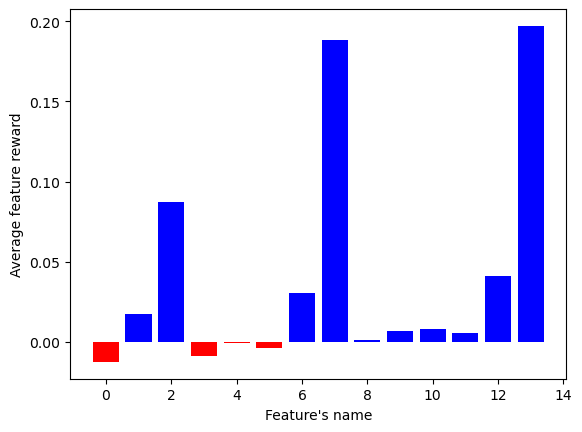

In [14]:
# Plot of the importance of each feature
fsrl_obj.get_feature_strengh(results)

---------- Data Processing ----------
---------- Score ----------
Set of variables : Benchmark (For Each Fold): [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]] and RL : [ 3  5  4  8 11  9 10  1  6 12  2  7 13]
Benchmark accuracy : 0.8644288989142728, RL accuracy : 0.8572634593550845 with 13 variables [0]
Set of variables : Benchmark (For Each Fold): [[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13], [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13], [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13]] and RL : [ 5  4  8 11  9 10  1  6 12  2  7 13]
Benchmark accuracy : 0.8636776427391251, RL accuracy : 0.8575605731072067 with 12 variables [0, 0]
Set of variables : Benchmark (For Each Fold): [[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13], [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13]

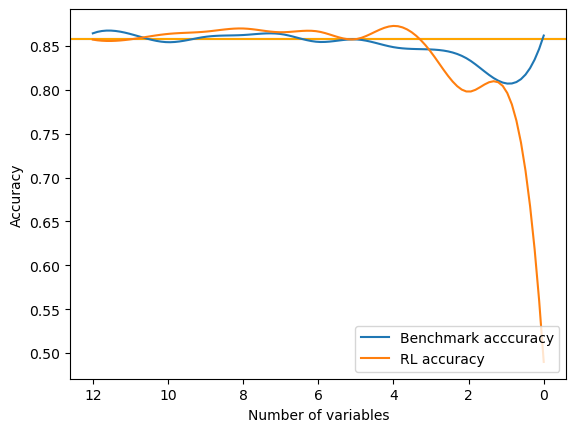

[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [15]:
# Plot the comparison with the benchmark
fsrl_obj.compare_with_benchmark(X, y, results)

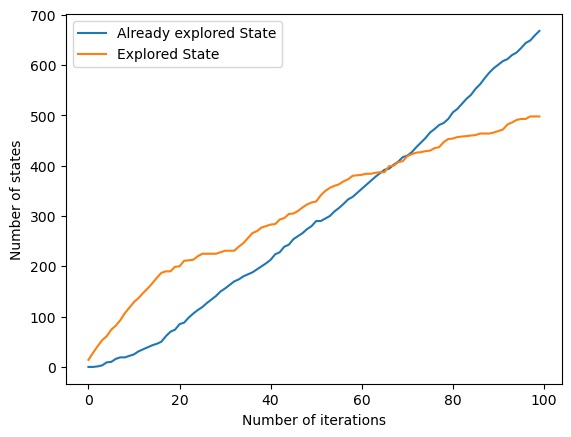

In [16]:
# Plot the ration exploration greedy step
fsrl_obj.get_plot_ratio_exploration()

In [17]:
# Plot the best states (for accuracy and v_value maximisation)
fsrl_obj.get_best_state()

([<FSRLearning.state.State at 0x1c4bcc1a090>, 0.8847932797717094],
 [<FSRLearning.state.State at 0x1c4bc132810>, 0.8445471532532729])

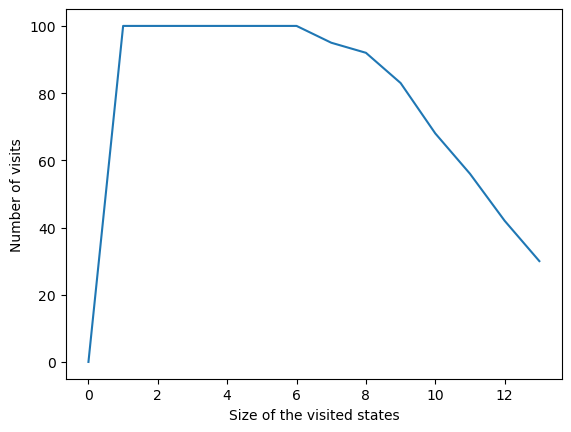

In [18]:
# Plot the detph of the browsing by the algorithm
fsrl_obj.get_depth_of_visited_states()

## Regression

In [27]:
#Import the library
from FSRLearning.feature_selector import FeatureSelectorRL
import pandas as pd

In [41]:
df = pd.read_csv("data/df_raw2.csv")
X = df.drop(['actual_monthly_return'], axis=1)
y = df['actual_monthly_return']

In [42]:
X.columns

Index(['tev_ufcf', 'tev_total_rev', 'mktcap_total_rev', 'high_price',
       'low_price', 'open_price', 'volume_change_yesterday'],
      dtype='object')

In [51]:
#Init of the selector object
fsrl_obj = FeatureSelectorRL(7, eps=.2, nb_iter=100)

In [52]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()

In [53]:
# We fit the model and get the results
results = fsrl_obj.fit_predict(X, y, clf = xgbr)
results

---------- Default Parameters init ----------
---------- Process init ----------
---------- Data Processing ----------
---------- The process has been successfully init ----------
---------- Training ----------


100%|██████████| 100/100 [00:29<00:00,  3.40it/s]

---------- Results ----------


([(0, 1, 2, 3, 4, 5, 6),
  array([100.,  99., 100., 100.,  99.,  97.,  95.]),
  (-0.7350738779414692,
   -2.2993549300392986,
   -1.7070244403951649,
   -1.8486930905364591,
   -2.0387518981367285,
   -2.5869725049241357,
   -2.4541425088885105),
  array([5, 6, 1, 4, 3, 2, 0], dtype=int64)],
 690)

In [54]:
results[-1][1:]

TypeError: 'int' object is not subscriptable

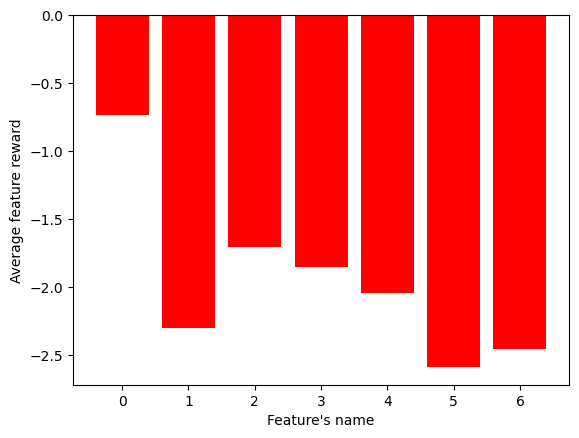

In [55]:
fsrl_obj.get_feature_strengh(results)

---------- Data Processing ----------
---------- Score ----------
Set of variables : Benchmark (For Each Fold): [['tev_ufcf', 'tev_total_rev', 'mktcap_total_rev', 'low_price', 'open_price', 'volume_change_yesterday'], ['tev_ufcf', 'tev_total_rev', 'mktcap_total_rev', 'high_price', 'open_price', 'volume_change_yesterday'], ['tev_ufcf', 'tev_total_rev', 'high_price', 'low_price', 'open_price', 'volume_change_yesterday'], ['tev_ufcf', 'tev_total_rev', 'mktcap_total_rev', 'high_price', 'open_price', 'volume_change_yesterday'], ['tev_ufcf', 'tev_total_rev', 'mktcap_total_rev', 'low_price', 'open_price', 'volume_change_yesterday']] and RL : [6 1 4 3 2 0]
Benchmark accuracy : -13.309266188040862, RL accuracy : 0 with 6 variables [1]
Set of variables : Benchmark (For Each Fold): [['tev_ufcf', 'tev_total_rev', 'mktcap_total_rev', 'low_price', 'volume_change_yesterday'], ['tev_ufcf', 'tev_total_rev', 'mktcap_total_rev', 'open_price', 'volume_change_yesterday'], ['tev_ufcf', 'tev_total_rev', 'hig

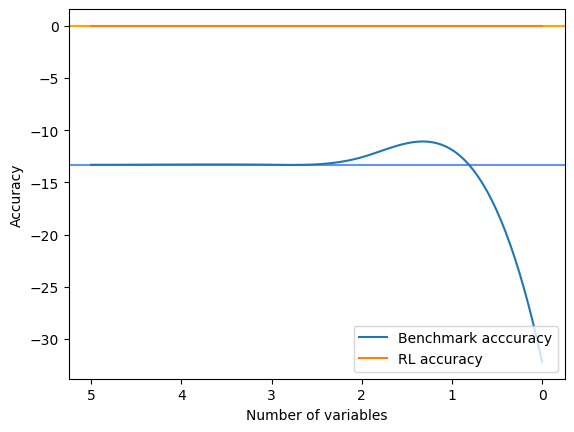

[1, 1, 1, 1, 1, 1]

In [56]:
fsrl_obj.compare_with_benchmark(X, y, results)